# Proyecto test A/B

**Descripción del proyecto ** 
**Contexto** 

Somos analistas en una gran tienda en línea. Junto con el departamento de marketing recolpilamos una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Priorizaremos estas hipótesis, lanzaremos un test A/B y analizaremos los resultados.
El análisis se compondrá de 4 partes: 
- 1. Descripción y análisis de los datos
- 2. Priorización de hipótesis
- 3. Análisis de test A/B
- 4. Conclusiones

In [1]:
#Importamos las librerias que utilizaremos en nuestro proyecto 

import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from datetime import datetime as dt

sns.set_theme()

# Parte 1. Priorizar hipótesis 

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

In [2]:
#Importamos los datasets
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep= ';')

In [3]:
#Analizamos hypotheses_df  
hypotheses_df.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#vemos la información
hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


A continuación aplicaremos el **framework ICE para priorizar hipótesis**. Ordenarlas en orden descendente de prioridad.

In [5]:
hypotheses_df['ICE'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence'])/ hypotheses_df['Effort']

ice_sorted = hypotheses_df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice_sorted 

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Al ordenar las hipótesis en orden de prioridad según los ICE scores, se busca identificar las ideas que tengan un alto potencial de impacto, una alta confianza en sus resultados y sean relativamente fáciles de implementar en primer lugar.
Esto significa que, según los cálculos realizados con los ICE scores, la hipótesis 8 tiene el mayor potencial de impacto, alta confianza y relativamente es fácil de implementar, por lo que debería tener la máxima prioridad en el proceso de toma de decisiones. De manera similar, las hipótesis con ICE scores más bajos tendrían una prioridad más baja.

Por otra parte, también aplicaremos **el framework RICE para priorizar hipótesis**. Ordenarlas en orden descendente de prioridad.

In [6]:
hypotheses_df['RICE'] = (hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence'])/ hypotheses_df['Effort']

rice_sorted = hypotheses_df[['Hypothesis', 'Reach', 'RICE']].sort_values(by='RICE', ascending=False)
rice_sorted

,Hypothesis,Reach,RICE
7,Add a subscription form to all the main pages....,10,112.0
2,Add product recommendation blocks to the store...,8,56.0
0,Add two new channels for attracting traffic. T...,3,40.0
6,Show banners with current offers and sales on ...,5,40.0
8,Launch a promotion that gives users discounts ...,1,16.2
3,Change the category structure. This will incre...,8,9.0
1,Launch your own delivery service. This will sh...,2,4.0
5,Add a customer review page. This will increase...,3,4.0
4,Change the background color on the main page. ...,3,3.0


In [7]:
#creamos una tabla la comparativa de las métricas RICE e ICE para cada una de las hipótesis.

combined_hypothesis = ice_sorted.merge(rice_sorted, on='Hypothesis', suffixes=('_ICE', '_RICE'))
combined_hypothesis

,Hypothesis,ICE,Reach,RICE
0,Launch a promotion that gives users discounts ...,16.200000,1,16.2
1,Add two new channels for attracting traffic. T...,13.333333,3,40.0
2,Add a subscription form to all the main pages....,11.200000,10,112.0
3,Show banners with current offers and sales on ...,8.000000,5,40.0
4,Add product recommendation blocks to the store...,7.000000,8,56.0
5,Launch your own delivery service. This will sh...,2.000000,2,4.0
6,Add a customer review page. This will increase...,1.333333,3,4.0
7,Change the category structure. This will incre...,1.125000,8,9.0
8,Change the background color on the main page. ...,1.000000,3,3.0


En este caso, estamos utilizando el RICE score para priorizar las hipótesis. A diferencia del ICE score, el RICE score también tiene en cuenta el alcance potencial de una hipótesis, es decir, cuántos usuarios o partes interesadas se verían afectados por su implementación.
Comparando los resultados de la priorización con RICE respecto a ICE, podemos observar que hay algunos cambios significativos en la prioridad de las hipótesis. El RICE score toma en cuenta el alcance, lo que significa que las hipótesis que afectarían a más usuarios o partes interesadas se clasifican más arriba en la lista.
En este caso específico, la hipótesis 7 ("Add a subscription form to all the main pages") se posiciona en el primer lugar debido a su alto alcance (Reach: 10) y un impacto significativo y alta confianza. Mientras tanto, la hipótesis 8 ("Launch a promotion that gives users discounts") que tenía el ICE score más alto en el enfoque anterior, desciende al quinto lugar en la lista de RICE debido a que su alcance es más limitado (Reach: 1).
En resumen, el uso de RICE en lugar de ICE cambia la priorización de las hipótesis al tener en cuenta el alcance potencial de cada idea. Las hipótesis que tienen un mayor alcance (afectan a más usuarios) y, al mismo tiempo, tienen un alto impacto y confianza, obtienen una mayor prioridad en la lista. Esto permite enfocarse en aquellas ideas que tienen la capacidad de generar un mayor impacto en un número significativo de usuarios o partes interesadas.

# Parte 2. Análisis de test A/B

**Dataframe Orders**

In [8]:
#Primero cargamos los datasets 

orders_df = pd.read_csv('/datasets/orders_us.csv')

orders_df['date'] = orders_df['date'].map(
    lambda x: dt.strptime(x, '%Y-%m-%d'))

visits_df = pd.read_csv('/datasets/visits_us.csv')
visits_df['date'] = visits_df['date'].map(
    lambda x: dt.strptime(x, '%Y-%m-%d'))


In [9]:
#sacamos la información del dataset orders
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
#sacamos la información del dataset orders
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# encontrar los visitorId que aparecen en ambos grupos (A and B) 
common_visitor_ids = set(orders_df[orders_df['group'] == 'A']['visitorId']).intersection(
    set(orders_df[orders_df['group'] == 'B']['visitorId'])
)

# Excluimos common_visitor_ids de orders_df
orders_df = orders_df[~orders_df['visitorId'].isin(common_visitor_ids)]

# Excluimos common_visitor_ids de visits_df
visits_df = visits_df[~visits_df['visits'].isin(common_visitor_ids)]



Para trazar los gráficos que siguien , recopilaremos  datos acumulados. Vamos a declalar un DataFrame llamado **cumulativeData** con las siguientes columnas:
- date
- group
- orders — el número de pedidos en la fecha especificada para el grupo especificado
- buyers — el número de usuarios que realizan al menos un pedido en la fecha especificada para el grupo especificado
- revenue — los ingresos en la fecha especificada para el grupo especificado (tamaño promedio de compra)
- visitors — el número de visitantes de la tienda en línea en la fecha especificada para el grupo especificado

In [13]:
#recopilaremos en varios pasos los datos diarios acumulados agregados sobre pedidos.

# crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders_df[['date','group']].drop_duplicates()

#  obtenemos los datos diarios acumulados agregados sobre los pedidos 
ordersAggregated = datesGroups.apply(lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'], orders_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtén los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'], visits_df['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [14]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     float64       
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ KB


**1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

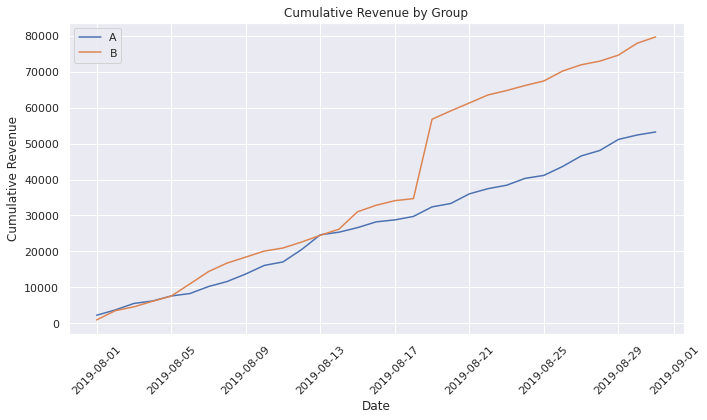

In [15]:
#Crearemos un gráfico de ingresos acumulados por día y grupo de prueba A/B
plt.figure(figsize=(10,6))

#DF con pedidos acumulados e ingresos acumulados por día, grupo A
cumulative_revenue_a = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

#DF con pedidos acumulados e ingresos acumulados por día, grupo B
cumulative_revenue_b = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#Trazamos el gráfico de ingresos del grupo A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

#Trazamos el gráfico de ingresos del grupo B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los ingresos aumentan constantemente durante toda la prueba.
Sin embargo, podemos ver que ambos grupos tienen picos en los ingresos en ciertos puntos. Esto puede implicar un aumento en el número de pedidos o la existencia de pedidos muy caros en la muestra.

Por otra parte, podemos ver que hasta, aproximadamente, el 5 de agosto ambos grupos cuentan con el mismo ingreso acumulado. Por lo que, puede ser que el experimento entre ambos grupos hubiera comenzado después de esta fecha, ya que es aquí cuando ambos comienzan a variar, resultanto en un ingreso acumulado mayor por parte del grupo B. 

**2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.**

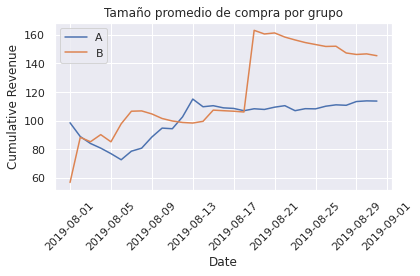

In [16]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Tamaño promedio de compra por grupo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El tamaño promedio de la compra cae al final de prueba para el grupo B, luego de su mayor peak el 17 de agosto. A diferencia del grupo A, que logra estabilizarse con un pequeño incremento al final de la prueba. 

**3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

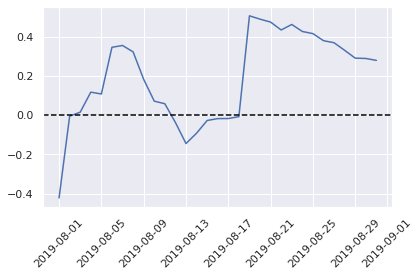

In [17]:
#Reuniremos los datos en un DataFrame
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A','B'])

#Trazamos un gráfico con las diferencias relativas para los tamaños de compra promedio
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

#agregamos una linea horizontal al eje x
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En varios puntos, la diferencia entre los segmentos aumenta, lo que implica que el tamaño promedio de los pedidos del grupo B es mayor que el del grupo A. 
Esto puede significar que deben haber algunos pedidos grandes y valores atípicos


**4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.**

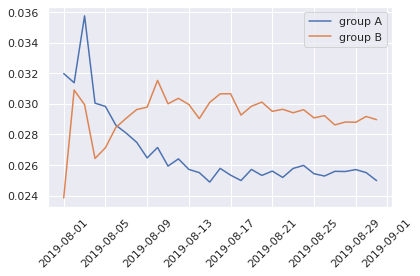

In [18]:
#Calculamos la conversión acumulada
cumulativeData['conversion']= cumulativeData['orders']/ cumulativeData['visitors']

#seleeccionamos los datos en el grupo A
cumulativeData_a = cumulativeData[cumulativeData['group'] == 'A']
#seleeccionamos los datos en el grupo B
cumulativeData_b = cumulativeData[cumulativeData['group'] == 'B']

#trazamos los gráficos
plt.plot(cumulativeData_a['date'], cumulativeData_a['conversion'], label='group A')
plt.plot(cumulativeData_b['date'], cumulativeData_b['conversion'], label='group B')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los grupos fluctuaron alrededor de diferentes valores, la tasa de conversión del grupo A aumentó antes de caer fuertemente para el 05 de agosto, pasando luego a estabilizarse dentro de los mismos rangos. 
En cuando al grupo B, este aumentó su conversión a partir del 05 de agosto, fecha en la que al parecer comeinza el test, estabilizandose al final de la prueba. 



**5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

In [19]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


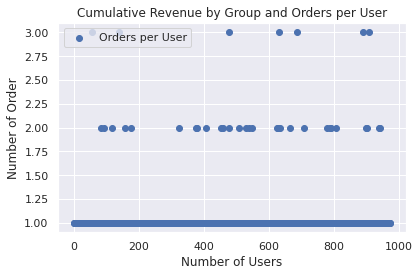

In [20]:
#crearemos un dataset de ordenes por usuario

orders_by_users= (
   orders_df.drop(['date', 'revenue', 'group'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})

)
orders_by_users.columns=['visitorId', 'orders']

#razar un gráfico de dispersión con el número de pedidos por usuario

x_values= pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'],  label='Orders per User')
plt.xlabel('Number of Users')
plt.ylabel('Number of Order')
plt.title('Cumulative Revenue by Group and Orders per User')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Aquí podemos ver que hay muchos usuarios con uno o dos pedidos. Después de esto, tenemos muy pocos pedido. Sin embargo, existen anomalías de personas que tienen 3 pedidos en su orden. 

**6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [21]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


No hay más del 5% de los usuarios que realizaron más de 1 pedido, y no más del 1% de los usuarios realizaron más de 2 pedidos. 
Por lo tanto, sería razonable establecer 2 por usuario como límite inferior para el número de pedidos y filtrar las anomalías en base a ello. 

**7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

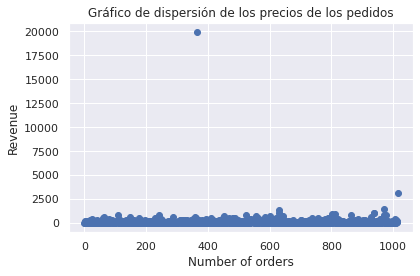

In [22]:
#encontraremos los valores para el eje horizontal tomando los valores de la columna 'revenue'

x_values_revenue= pd.Series(range(0, len(orders_df['revenue'])))
plt.scatter(x_values_revenue, orders_df['revenue'])
plt.xlabel('Number of orders')
plt.ylabel('Revenue')
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()


La mayoría de los pedidos son de menos de $ 2.500 . 
Hay valores atípicos de más de este valor y otro de casi $20.000

**8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [23]:
print(np.percentile(orders_df['revenue'], [95, 99]))

[414.275 830.3  ]


No hay más del 5% de los usuarios realizaron pedidos que costaron más de 414. No más del 1%  realizaron pedidos más caros que 803

**9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [24]:
#Crearemos las variables 'orders_by_userA' y 'orders_by_userB' para almacenar columas ['userId', 'orders']
#para usuarios con al menos 1 pedido 

orders_by_usersA = orders_df[orders_df['group'] =='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersA.columns = ['visitorId', 'orders']

orders_by_usersB = orders_df[orders_df['group'] =='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_usersB.columns  = ['visitorId', 'orders']

Ahora declararemos las variables sampleA y sampleB, con usuarios de diferentes grupos y números de pedidos correspondientes. Los que no pidieron nada tendrán un 0. Esto es necesario para preparar las muestras para la prueba de Mann-Whitney.

In [25]:
sampleA = pd.concat(
    [
        orders_by_usersA['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visits_df[visits_df['group']=='A']['visits'].sum() 
                - len(orders_by_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [26]:
sampleB = pd.concat(
    [
        orders_by_usersB['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visits_df[visits_df['group']=='B']['visits'].sum() 
                - len(orders_by_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [27]:
alpha = 0.05 # nivel de significancia

print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print("Rechazamos la hipótesis nula")
else: 
    print("No rechazamos la hipótesis nula")


p-value: 0.013
Rechazamos la hipótesis nula


Según los datos sin procesar, hay diferencia entre los grupos A y B.

El valor p 0.013, que es menor que 0,05. Entonces,  podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los grupos. 

**10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [28]:
p_value = stats.mannwhitneyu(orders_df[orders_df['group'] == 'A']['revenue'], orders_df[orders_df['group'] == 'B']['revenue'])[1]

print("p-value:", "{0:.3f}".format(p_value))

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.862
No rechazamos la hipótesis nula


Vemos que p es considerablemente superior a 0,05. Por lo tanto no rechazamos la hipótesis nula. 
Esto quiere decir, que no hay una significación estadística en la diferencia  en el tamaño promedio de pedido entre los grupos. 

**11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

Debido a los percentiles obtenidos anteriormente el tamaño promedio de pedido fue 414 y 830. Para el número de usuarios, los percentiles 95 y 99 fueron 1 y 1 pedidos .
Por ende, consideraremos usuarios anómalos a aquellos que realizaron 2 o más pedidos. Así, eliminaremos el 1% de los usuarios con más pedidos  y entre el 1% y 5% de los pedidos más caros. 

In [29]:
#Vamos a encontrar el número total de usuarios anómalos
usersWithManyOrders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA['orders'] > 2]['visitorId'],
        orders_by_usersB[orders_by_usersB['orders'] > 2]['visitorId'],
    ], axis=0)

userWithExpensiveOrders = orders_df[orders_df['revenue'] > 622]['visitorId'] #entre 1% y el 5% de los pedidos más caros

abnormalUsers = (
    pd.concat([usersWithManyOrders, userWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape

(30,)

En total, tenemos 30 usuarios anómalos.
Tratemos de averiguar cómo sus acciones afectaron los resultados de la prueba. Calcularemos la significancia estadística de las diferencias en la conversión entre los grupos con datos filtrados. 

A continuación prepararemos muestras del número de pedidos por usuario para cada grupo de prueba:

In [30]:
sampleAFiltered = pd.concat(
    [
        orders_by_usersA[
            np.logical_not(orders_by_usersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visits_df[visits_df['group']=='A']['visits'].sum() 
                - len(orders_by_usersA['orders'])),name='orders')],axis=0)


sampleBFiltered = pd.concat(
    [
        orders_by_usersB[
            np.logical_not(orders_by_usersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visits_df[visits_df['group']=='B']['visits'].sum() 
                - len(orders_by_usersB['orders'])),name='orders')],axis=0)

#Probamos la hipótesis

p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value:", "{0:.3f}".format(p_value))

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")



p-value: 0.004
Rechazamos la hipótesis nula


Al igual que los datos sin procesar , hemos alcanzado un nivel de significación. Es decir, hay una diferencia significativa entre los dos grupos. 

**12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [31]:
p_value = stats.mannwhitneyu(
    orders_df[
        np.logical_and(
            orders_df['group'] == 'A',
            np.logical_not(orders_df['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders_df[
        np.logical_and(
            orders_df['group'] == 'B',
            np.logical_not(orders_df['visitorId'].isin(abnormalUsers)),
        )
    ]['revenue']
)[1]


print("p-value:", "{0:.3f}".format(p_value))

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.901
No rechazamos la hipótesis nula


Al igual que los datos sin procesar, rechazamos la hipótesis nula. Por lo que no hay diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos.
Esto significa que eliminar los valores atípicos no disminutó la cantidad de ruido entre los datos . 

**13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:**
- 1. Para la prueba, considera a uno de los grupos como líder. 
- 2. Para la prueba, concluye que no hay diferencia entre los grupos. 
- 3. Continúa la prueba.

Abordando los puntos anteriores, el grupo B fue el que tuvo mejores tasas de conversión y crecimiento en el ingreso acumulado vs el grupo A.
Por otra parte, en cuanto a las pruebas de hipótesis, se rechazaron todas las hipoesis nulas. Por ende, hay una diferencia significativa entre los dos grupos.
